<h1 style="text-align: center;">Quantum-Platform-Compare: Implementation of Shor's Algorithm</h1>
<br>
<!--<p style="text-align: center;"><strong>Prepared for:</strong> Dr. Sultan Almuhammadi</p>-->
<p style="text-align: center;"><strong>Prepared by:</strong> Ahmed Almalki</p>
<hr>

## Overview
<table align="left">
  <thead>
    <tr>
      <th></th>
      <th><strong>qiskit</strong></th>
      <th><strong>Cirq</strong></th>
      <th><strong>pyQuil</strong></th>
      <th><strong>pytket</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>First Release Date</strong></td>
      <td>10-Nov-17</td>
      <td>17-Apr-18</td>
      <td>16-Jan-17</td>
      <td>21-Sep-21</td>
    </tr>
    <tr>
      <td><strong>Number of Releases</strong></td>
      <td>116</td>
      <td>25</td>
      <td>237</td>
      <td>142</td>
    </tr>
    <tr>
      <td><strong>Latest Release</strong></td>
      <td>1.0.2 (Mar 8, 2024)</td>
      <td>1.3.0 (Dec 2, 2023)</td>
      <td>4.10.0 (Apr 29, 2024)</td>
      <td>1.28.0 (May 17, 2024)</td>
    </tr>
    <tr>
      <td><strong>GitHub Stars</strong></td>
      <td>4.6k</td>
      <td>4.1k</td>
      <td>1.4k</td>
      <td>232</td>
    </tr>
    <tr>
      <td><strong>GitHub Contributors</strong></td>
      <td>556</td>
      <td>212</td>
      <td>97</td>
      <td>40</td>
    </tr>
    <tr>
      <td><strong>StackExchange Questions</strong></td>
      <td>2327</td>
      <td>181</td>
      <td>15</td>
      <td>9</td>
    </tr>
    <tr>
      <td><strong>Number of Downloads</strong></td>
      <td>5M</td>
      <td>3M</td>
      <td>3M</td>
      <td>2M</td>
    </tr>
    <tr>
      <td><strong>Developed by</strong></td>
      <td>IBM</td>
      <td>Google</td>
      <td>Rigetti</td>
      <td>Quantinuum</td>
    </tr>
  </tbody>
</table>

> *reviewed date: May 17, 2024

## Version Information

<table align="left">
  <thead>
    <tr>
      <th>Component</th>
      <th>Version</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>python</td>
      <td>3.11.5</td>
    </tr>
    <tr>
      <td>qiskit</td>
      <td>0.45.3</td>
    </tr>
    <tr>
      <td>qiskit-ibmq-provider</td>
      <td>0.20.2</td>
    </tr>
  </tbody>
</table>

</table>


# What Shor Algorithm
- It is a `quantum algorithm` for integer factorization.
- It is Developed by Peter Shor in `1994`.
- It significantly potential impacts cryptography, `RSA`.
- It Operates in `polynomial` time, much faster than classical algorithms for the same task.
- The objective is to find the prime factors of a composite number `N`.

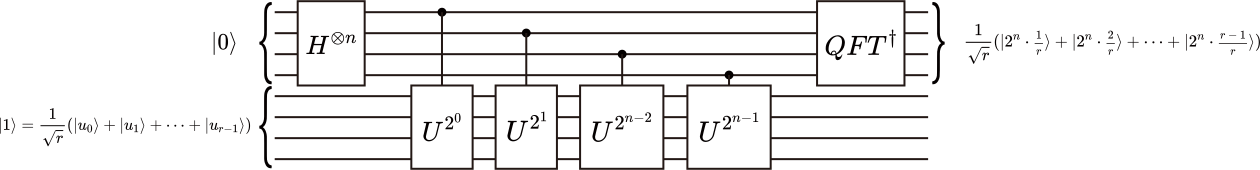

# The Potential Impacts of Shor Algorithm
- **Q-Day**: Hypothetical point in time when quantum computers become powerful enough to break much of today's encryption.
- **Cybersecurity Risks**: Breakdown of current encryption, leading to widespread data vulnerability.
- **Financial Systems Instability**: Compromise of encrypted banking and financial transactions.
- **National Security Threats**: Risk to defense communication and data systems.
- **Loss of Privacy**: Personal and sensitive information becoming easily accessible.

# Build `Controlled U Gate`
- Identify `n` and `m` qubits lengths.
- Determine if the given `a` is accepted value.
- Identify the required x gates by `a` XOR `1` 
- Build the circuit.

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT


from qiskit.visualization import plot_histogram, circuit_drawer, plot_state_city, plot_state_hinton

from qiskit.compiler import transpile, assemble

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import math
from fractions import Fraction

from sympy import isprime
import random

In [10]:
def find_all_as(N):
    ns=[]
    for n in range(2,N):
        if math.gcd(n,N)==1:
            ns.append(n)
    return ns

def validate_a(a):
    ns = find_all_as(N)
    if a not in ns:
        raise ValueError(f"'a' must be one of {ns}")
    return True

def get_nlen_mlen(N):       
    n_len = math.ceil(math.log2(N))
    m_len = 2 * n_len
    return n_len, m_len 

def is_power_of_prime(N):
    for base in range(2, int(math.sqrt(N)) + 1):
        power = 2
        while (result := base ** power) <= N:
            if result == N:
                return True
            power += 1
    return False

def validate_N(N):
    if isprime(N):
        raise ValueError(f"{N} is a prime.")
    if is_power_of_prime(N):
        raise ValueError(f"{N} is a power of a prime.")
    return True


def check_r_condition(a, r, N):
    if r % 2 == 0 and pow(a, r // 2, N) != N - 1:
        return True
    else:
        return False
    
    
# 100 of prime numbers
prime_100 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 
             107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 
             227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 
             349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 
             467, 479, 487, 491, 499, 503, 509, 521, 523, 541]

def generate_N():
    ACCEPTED_N = False
    max_qubits = 29
    while not ACCEPTED_N:
        ps = random.sample(prime_100[5:], 2)
        N = ps[0]*ps[1]
        n_len, m_len = get_nlen_mlen(N)
        if n_len+m_len<=max_qubits:
            print(f"N = {ps[0]} * {ps[1]} = {N}")
            return N

In [26]:
def initiate_qc(N):
    # identify n-length and m-length
    n_len, m_len = get_nlen_mlen(N)
    
    qc = QuantumCircuit(m_len + n_len, m_len)
    
    # Initialize counting qubits
    # in state |+>
    for q in range(m_len):
        qc.h(q)

    # And auxiliary register in state |1>
    qc.x(m_len)

    return qc


def append_c_amodN(qc, a, N, barrier=False):
    n_len, m_len = get_nlen_mlen(N)
    
    for q in range(m_len):
        pwr = 2**q
        for i, bit in enumerate(format(pow(a, pwr, N) ^ 1, f'0{n_len}b')):
            if bit == '1':
                qc.cx(q, i + m_len)
        qc.barrier() if barrier else _
    
    return qc
  
    
        
def append_c_amodN_gates(qc, a, N):
    n_len, m_len = get_nlen_mlen(N)
            
    for q in range(m_len):
        pwr = 2**q
        qc.append(c_amodN_gate(a, N, pwr),
                 [q] + [i+m_len for i in range(n_len)])
    
    return qc



def c_amodN_gate(a, N, pwr):
    n_len, m_len = get_nlen_mlen(N)
    
    U = QuantumCircuit(n_len)
    for i, bit in enumerate(format(pow(a,pwr,N)^1, f'0{n_len}b')):
        if bit == '1':
            U.x(i)

    U = U.to_gate()
    U.name = f"[{a}^{pwr} mod {N}]"
    c_U = U.control()
         
    return c_U



def append_IQFT(qc, N):
    n_len, m_len = get_nlen_mlen(N)
    qc.append(QFT(m_len, inverse=True), range(m_len))
    return qc



# this function just to draw what inside controlled U gate
def print_c_amodN(a, N):
    n_len, m_len = get_nlen_mlen(N)
    
    for p in range(m_len):
        pwr = 2**p
        _txt = f'a={a}, N={N}, p={p}, 2^p=pwr={pwr}'
        print(f"\n{_txt}\n{len(_txt)*'-'}")
    
        print(f"{format(pow(a,pwr,N), f'0{n_len}b')} | {a}^{pwr} mod {N} = {pow(a,pwr,N)}")
        print(f"{format(pow(a,pwr,N)^1, f'0{n_len}b')} | x_gates")
        

def simulation(qc, shots=1000):
    # Simulate Results
    # Transpile the circuit for the simulator
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)

    # Run the simulation
    result = simulator.run(compiled_circuit, shots=shots).result()

    # Get the result counts
    counts = result.get_counts(compiled_circuit)
    return list(set(counts))

# mode => 0: simple, 1: barrier, 2: U gates
def shor_qc(a, N, mode=0, display=False, shots=1):
    _, m_len = get_nlen_mlen(N)
    
    qc = initiate_qc(N)
    
    if mode==0:
        qc = append_c_amodN(qc, a, N)
    elif mode==1:
        qc = append_c_amodN(qc, a, N, barrier=True)
    elif mode==2:
        qc = append_c_amodN_gates(qc, a, N)
    else:
        raise ValueError(f"{mode} is not proper value.")
    
    qc = append_IQFT(qc, N)

    qc.measure(range(m_len), range(m_len))
    
    display(qc.draw(fold=-1, output='mpl', style='clifford')) if display else _
    
    return simulation(qc, shots)

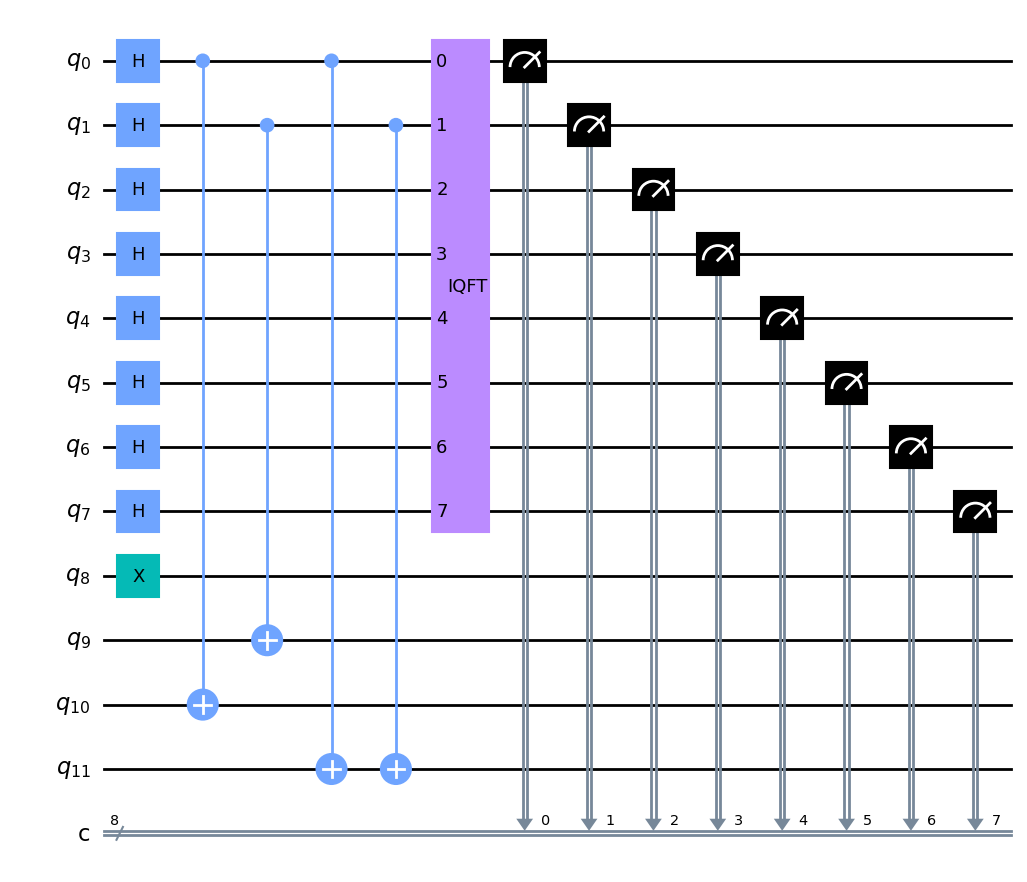

['11000000', '10000000', '00000000', '01000000']


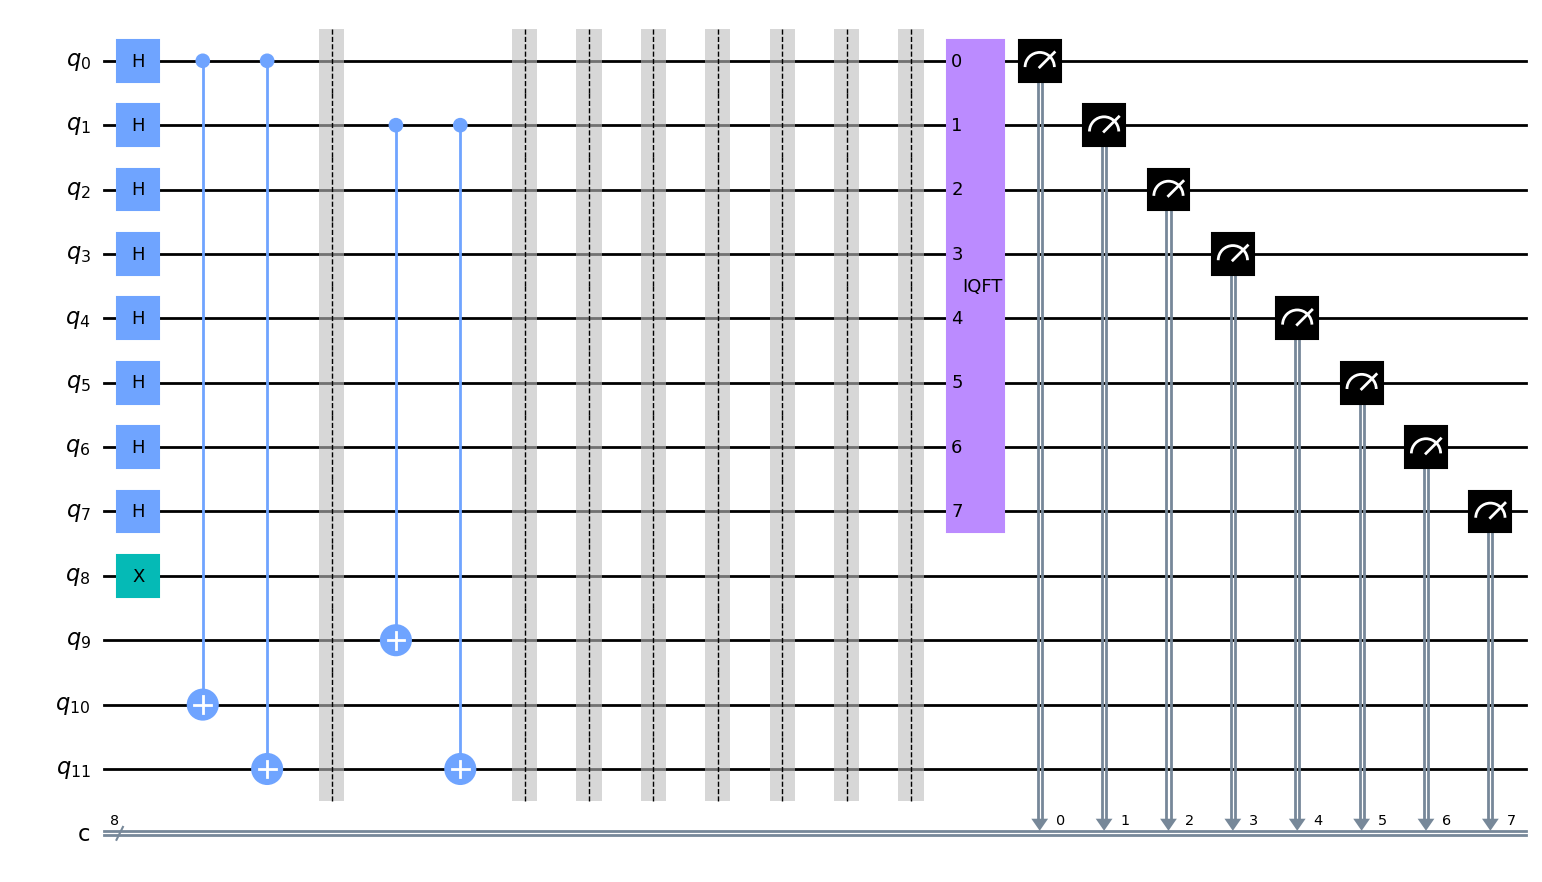

['11000000', '10000000', '00000000', '01000000']


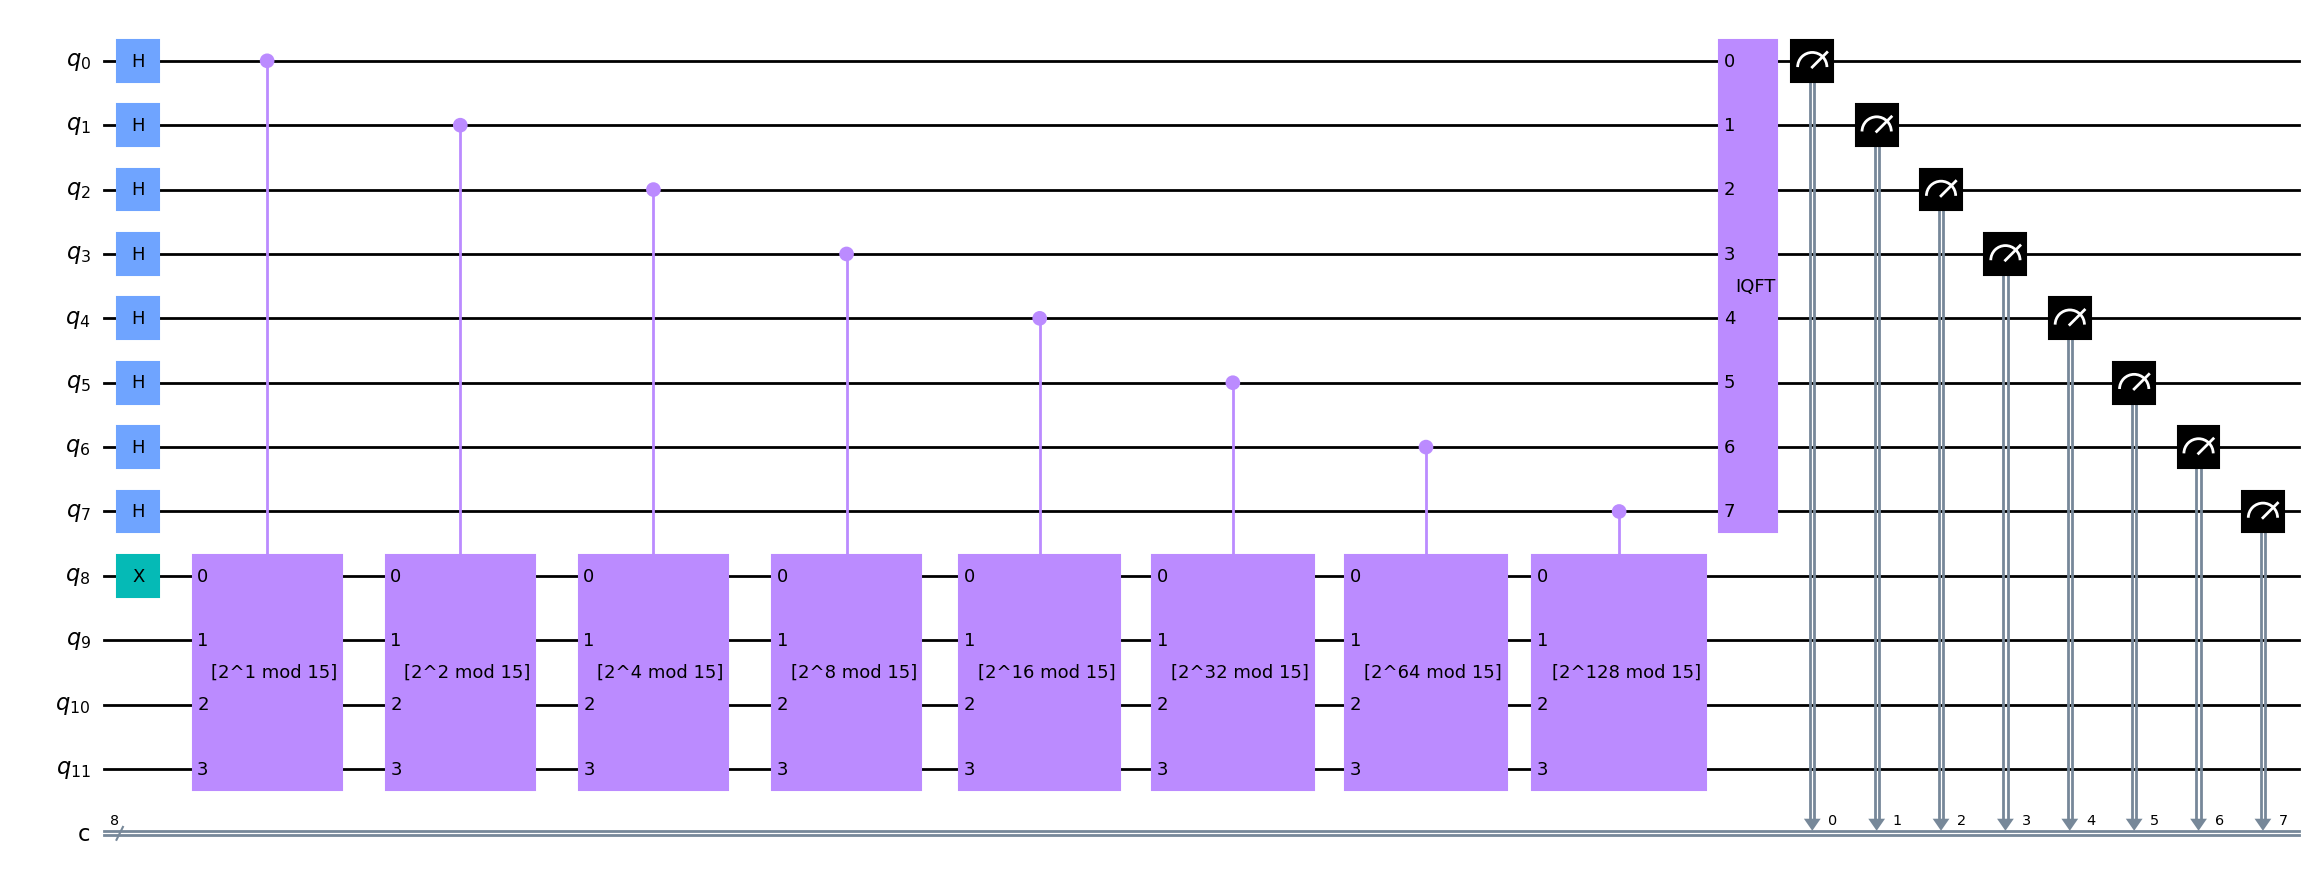

['11000000', '10000000', '00000000', '01000000']


In [27]:
N=15
a=2
validate_N(N)
validate_a(a)

_, m_len = get_nlen_mlen(N)

# simple circuit 
qc = initiate_qc(N)
qc = append_c_amodN(qc, a, N)
qc = append_IQFT(qc, N)

qc.measure(range(m_len), range(m_len))

display(qc.draw(fold=-1, output='mpl', style='clifford'))
print(simulation(qc))


# circuit with barrier
qc = initiate_qc(N)
qc = append_c_amodN(qc, a, N, barrier=True)
qc = append_IQFT(qc, N)

qc.measure(range(m_len), range(m_len))

display(qc.draw(fold=-1, output='mpl', style='clifford'))
print(simulation(qc))


# circuit with U gates
qc = initiate_qc(N)
qc = append_c_amodN_gates(qc, a, N)
qc = append_IQFT(qc, N)

qc.measure(range(m_len), range(m_len))

display(qc.draw(fold=-1, output='mpl', style='clifford'))
print(simulation(qc))

In [28]:
print_c_amodN(a, N)


a=2, N=15, p=0, 2^p=pwr=1
-------------------------
0010 | 2^1 mod 15 = 2
0011 | x_gates

a=2, N=15, p=1, 2^p=pwr=2
-------------------------
0100 | 2^2 mod 15 = 4
0101 | x_gates

a=2, N=15, p=2, 2^p=pwr=4
-------------------------
0001 | 2^4 mod 15 = 1
0000 | x_gates

a=2, N=15, p=3, 2^p=pwr=8
-------------------------
0001 | 2^8 mod 15 = 1
0000 | x_gates

a=2, N=15, p=4, 2^p=pwr=16
--------------------------
0001 | 2^16 mod 15 = 1
0000 | x_gates

a=2, N=15, p=5, 2^p=pwr=32
--------------------------
0001 | 2^32 mod 15 = 1
0000 | x_gates

a=2, N=15, p=6, 2^p=pwr=64
--------------------------
0001 | 2^64 mod 15 = 1
0000 | x_gates

a=2, N=15, p=7, 2^p=pwr=128
---------------------------
0001 | 2^128 mod 15 = 1
0000 | x_gates


In [29]:
ps = random.sample(prime_100[5:], 2)
print(f"N = {ps[0]} * {ps[1]} = {ps[0]*ps[1]}")

N = 127 * 263 = 33401


In [30]:
generate_N()

N = 23 * 19 = 437


437

In [31]:
generate_N()

N = 19 * 13 = 247


247

In [64]:
FACTOR_FOUND = False
ATTEMPT = 0

N = generate_N()


# validate_N(N)  # no need to validate N value

n_len, m_len = get_nlen_mlen(N)

while not FACTOR_FOUND:
    ATTEMPT = 0
    for a in range(2,N):
        if math.gcd(a,N)==1:
            ATTEMPT += 1
            _txt = f'\n[a = {a}]'
            print(f"{_txt}\n{'-'*len(_txt)}")
            print(f"ATTEMPT {ATTEMPT}:")
            
            readings = shor_qc(a, N)
            for reading in readings:
                print(f"\nRegister Reading: {reading} [{int(reading,2)}]")
                phase = int(reading,2)/(2**m_len)
                frac = Fraction(phase).limit_denominator(N)
                r = frac.denominator
                print(f"Corresponding Phase: [{int(reading,2)}/{(2**m_len)}] >>> {phase:0.5f} >>> {frac}")
                
                print(f"Result: r = {r}")

                if not check_r_condition(a, r, N):
                    print(f"[{r}] did not pass r conditions")
                    continue

                if phase != 0:
                    # Guesses for factors are gcd(x^{r/2} ±1 , 15)
                    guesses = [math.gcd(a**(r//2)-1, N), math.gcd(a**(r//2)+1, N)]
                    print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
                    for guess in guesses:
                        if guess not in [1,N] and (N % guess) == 0:
                            # Guess is a factor!
                            print(f"*** Non-trivial factor found: {guess} ***")
                            FACTOR_FOUND = True
                            
                if FACTOR_FOUND:
                    break

        else:
            print(f'\n# [a={a}] is not an accepted value! #')
            
        if FACTOR_FOUND:
            break
    
    if not FACTOR_FOUND:
        print('\nALL VALID A VALUES ARE USED !')
        FACTOR_FOUND = True

N = 13 * 19 = 247

[a = 2]
--------
ATTEMPT 1:

Register Reading: 1100001110110000 [50096]
Corresponding Phase: [50096/65536] >>> 0.76440 >>> 146/191
Result: r = 191
[191] did not pass r conditions

[a = 3]
--------
ATTEMPT 2:

Register Reading: 1000010111101000 [34280]
Corresponding Phase: [34280/65536] >>> 0.52307 >>> 34/65
Result: r = 65
[65] did not pass r conditions

[a = 4]
--------
ATTEMPT 3:

Register Reading: 0101001010001111 [21135]
Corresponding Phase: [21135/65536] >>> 0.32249 >>> 79/245
Result: r = 245
[245] did not pass r conditions

[a = 5]
--------
ATTEMPT 4:

Register Reading: 0000000000000000 [0]
Corresponding Phase: [0/65536] >>> 0.00000 >>> 0
Result: r = 1
[1] did not pass r conditions

[a = 6]
--------
ATTEMPT 5:

Register Reading: 1100110010110011 [52403]
Corresponding Phase: [52403/65536] >>> 0.79961 >>> 4/5
Result: r = 5
[5] did not pass r conditions

[a = 7]
--------
ATTEMPT 6:

Register Reading: 0110011001101010 [26218]
Corresponding Phase: [26218/65536] >>> 0

In [65]:
print_c_amodN(a, N)


a=8, N=247, p=0, 2^p=pwr=1
--------------------------
00001000 | 8^1 mod 247 = 8
00001001 | x_gates

a=8, N=247, p=1, 2^p=pwr=2
--------------------------
01000000 | 8^2 mod 247 = 64
01000001 | x_gates

a=8, N=247, p=2, 2^p=pwr=4
--------------------------
10010000 | 8^4 mod 247 = 144
10010001 | x_gates

a=8, N=247, p=3, 2^p=pwr=8
--------------------------
11101011 | 8^8 mod 247 = 235
11101010 | x_gates

a=8, N=247, p=4, 2^p=pwr=16
---------------------------
10010000 | 8^16 mod 247 = 144
10010001 | x_gates

a=8, N=247, p=5, 2^p=pwr=32
---------------------------
11101011 | 8^32 mod 247 = 235
11101010 | x_gates

a=8, N=247, p=6, 2^p=pwr=64
---------------------------
10010000 | 8^64 mod 247 = 144
10010001 | x_gates

a=8, N=247, p=7, 2^p=pwr=128
----------------------------
11101011 | 8^128 mod 247 = 235
11101010 | x_gates

a=8, N=247, p=8, 2^p=pwr=256
----------------------------
10010000 | 8^256 mod 247 = 144
10010001 | x_gates

a=8, N=247, p=9, 2^p=pwr=512
-------------------------

In [93]:
for i in range(0,2049*2,256):
    _N =2**i
    print(f'2^{i:04} > {len(str(_N)):04} Digits')

2^0000 > 0001 Digits
2^0256 > 0078 Digits
2^0512 > 0155 Digits
2^0768 > 0232 Digits
2^1024 > 0309 Digits
2^1280 > 0386 Digits
2^1536 > 0463 Digits
2^1792 > 0540 Digits
2^2048 > 0617 Digits
2^2304 > 0694 Digits
2^2560 > 0771 Digits
2^2816 > 0848 Digits
2^3072 > 0925 Digits
2^3328 > 1002 Digits
2^3584 > 1079 Digits
2^3840 > 1156 Digits
2^4096 > 1234 Digits


# Shor Algorithm Implementation
---

## Step 1&2: Determining `N` & `a`
- Use a polynomial algorithm to determine if `N` is prime or a power of prime.

- $1<$ `a` $<N$.

- `n_len` $=log_2 N$.

- `m_len` $=2\times$ `n_len`.

> If the targeted N requires 1000 bits for its representation, the quantum circuit will be composed of 1000 qubits.

In [94]:
N=7
a=2
n_len = math.ceil(math.log2(N))
m_len = 2*n_len

In [95]:
if isprime(N):
    print(f"{N} is a prime number")
else:
    print(f"{N} is not a prime number")

7 is a prime number


## Step 3: Quantum Circuit to Find a Period `r`

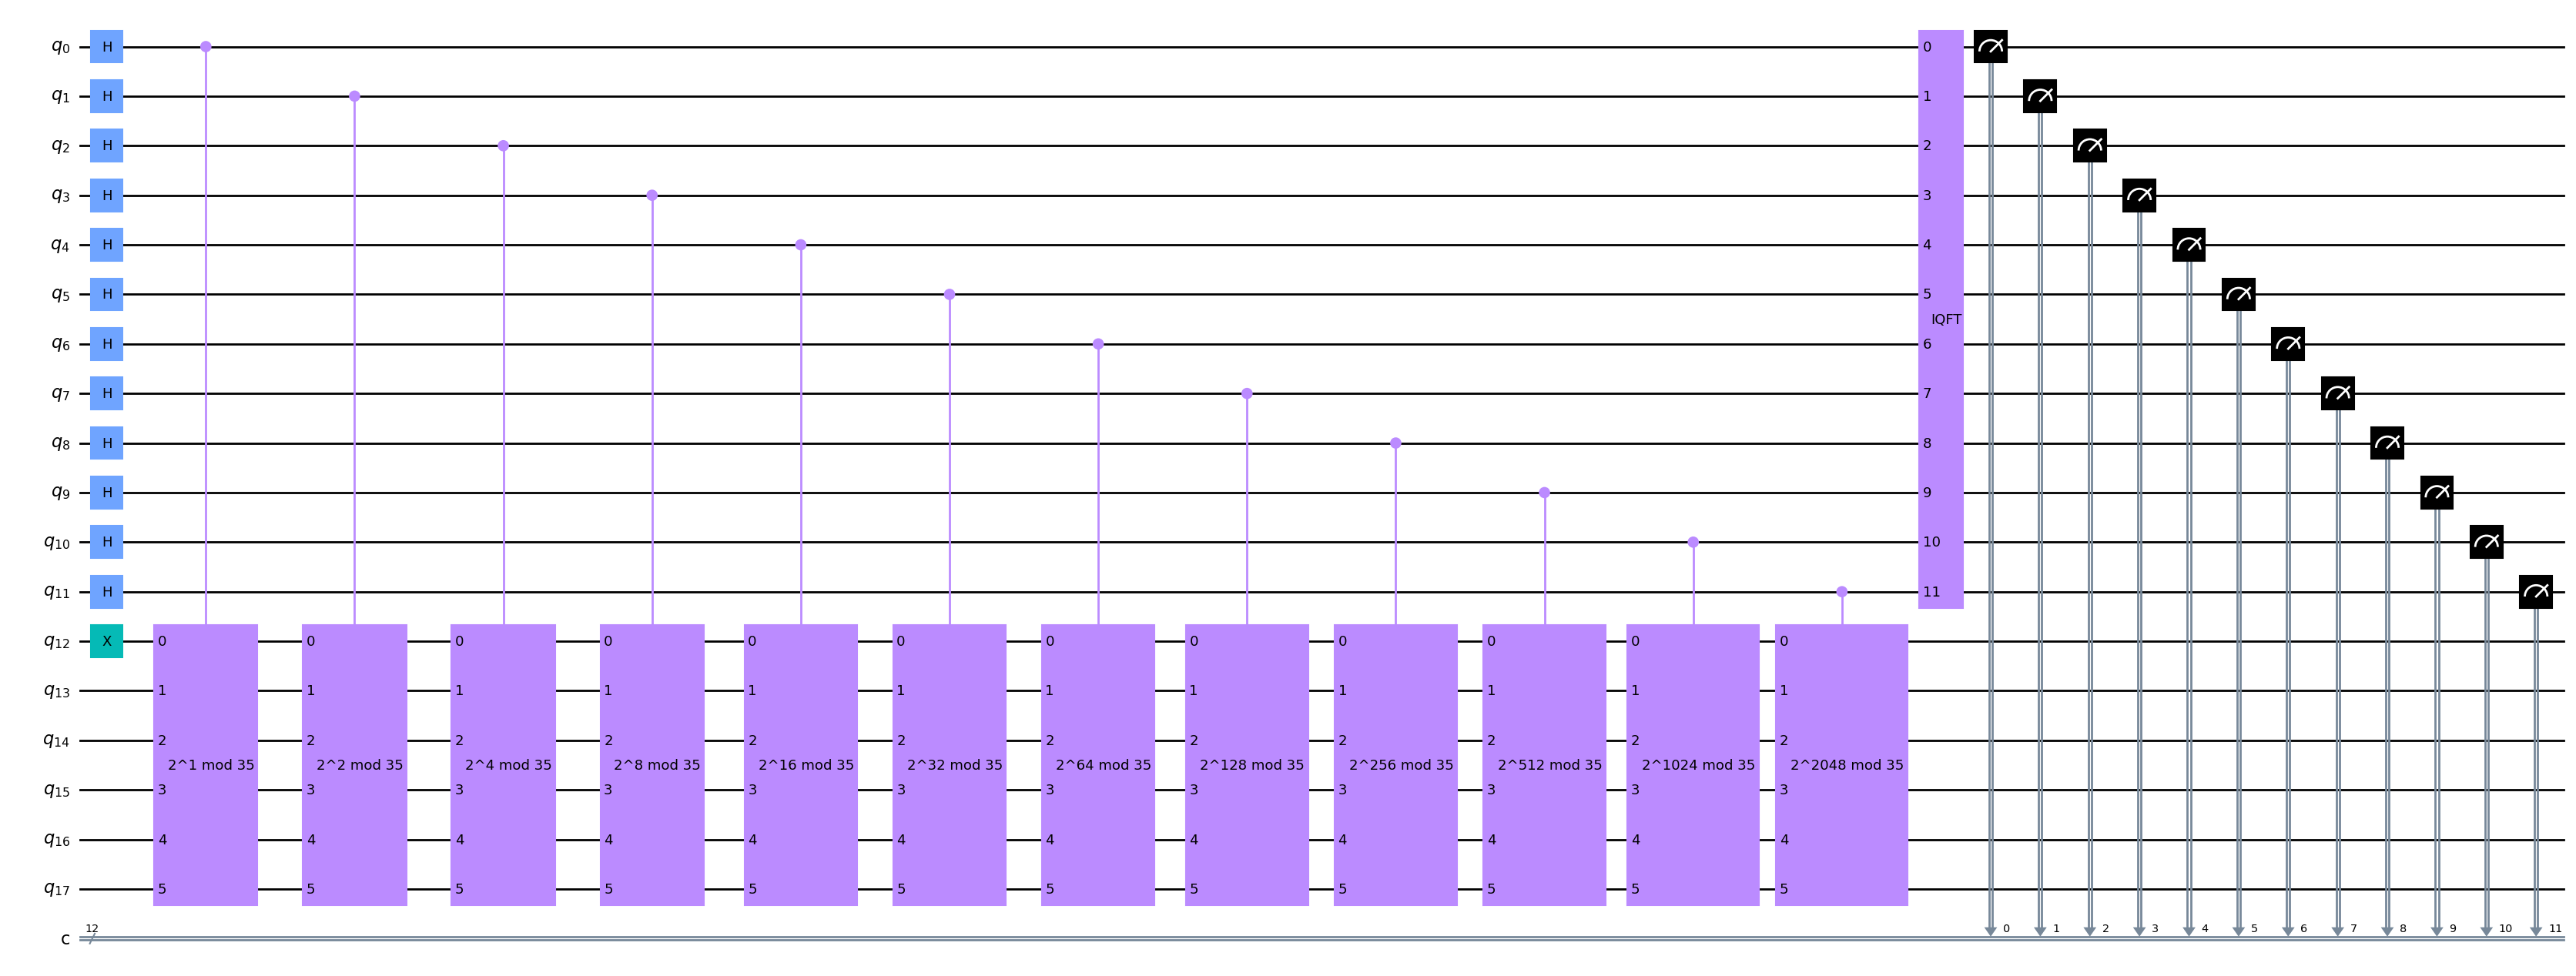

In [911]:
qc = QuantumCircuit(m_len + n_len, m_len)

# Initialize counting qubits
# in state |+>
for q in range(m_len):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(m_len)

# Do controlled-U operations
for q in range(m_len):
    qc.append(c_amodN(a, N, 2**q),
             [q] + [i+m_len for i in range(n_len)])

# Do inverse-QFT
# qc.append(qft_dagger(m_len), range(m_len))
qc.append(QFT(m_len, inverse=True), range(m_len))
# qc.append(QFT(m_len).inverse(), range(m_len))


# Measure circuit
qc.measure(range(m_len), range(m_len))
# qc.draw(fold=-1)
qc.draw(fold=-1, output='mpl', style='clifford')

In [792]:
# try:
#     IBMQ.load_account()
# except Exception as e:
#     print("Failed to load IBMQ account. Make sure your API token is saved.")
#     print(e)

In [793]:
from qiskit import Aer, IBMQ

# Function to print max qubits for simulators
def print_simulator_qubits():
    simulators = Aer.backends()
    for simulator in simulators:
        config = simulator.configuration()
        print(f"{simulator.name}: {config.n_qubits} qubits")

# Function to print max qubits for IBM Quantum devices
def print_ibmq_qubits():
    provider = IBMQ.get_provider(hub='ibm-q')
    backends = provider.backends()
    for backend in backends:
        config = backend.configuration()
        print(f"{backend.name()}: {config.n_qubits} qubits")

# Save your API token (run this only once)
# IBMQ.save_account('YOUR_API_TOKEN')

# Print max qubits for simulators
print("Simulators:")
print_simulator_qubits()

# Print max qubits for IBM Quantum devices
print("\nIBM Quantum Devices:")
print_ibmq_qubits()


Simulators:
aer_simulator: 29 qubits
aer_simulator_statevector: 29 qubits
aer_simulator_density_matrix: 14 qubits
aer_simulator_stabilizer: 10000 qubits
aer_simulator_matrix_product_state: 63 qubits
aer_simulator_extended_stabilizer: 63 qubits
aer_simulator_unitary: 14 qubits
aer_simulator_superop: 7 qubits
qasm_simulator: 29 qubits
statevector_simulator: 29 qubits
unitary_simulator: 14 qubits

IBM Quantum Devices:
ibmq_qasm_simulator: 32 qubits
simulator_statevector: 32 qubits
simulator_mps: 100 qubits
simulator_extended_stabilizer: 63 qubits
simulator_stabilizer: 5000 qubits
ibm_sherbrooke: 127 qubits
ibm_brisbane: 127 qubits
ibm_kyoto: 127 qubits
ibm_osaka: 127 qubits


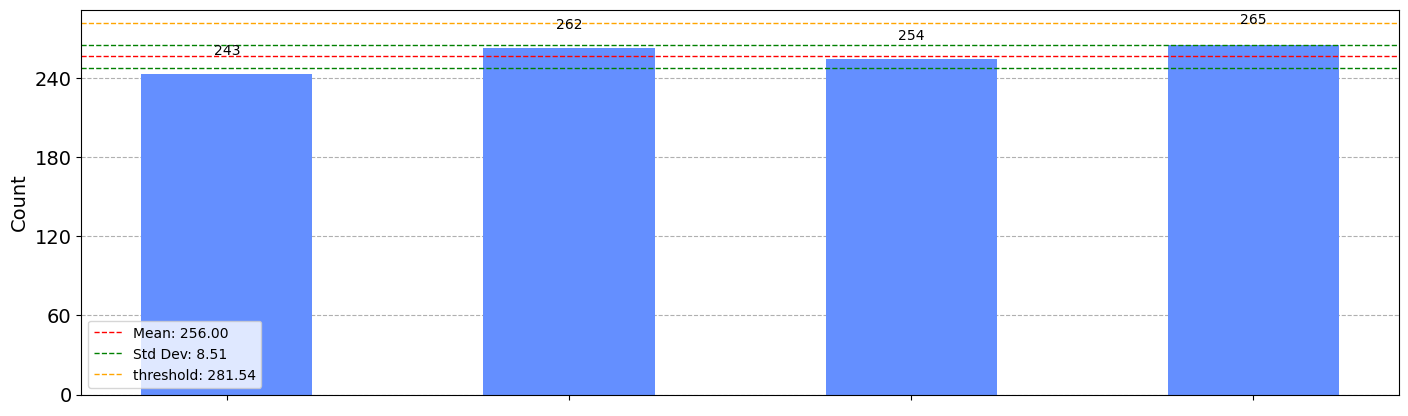

Outliers: {'11000000': 265, '00000000': 243, '01000000': 262, '10000000': 254}


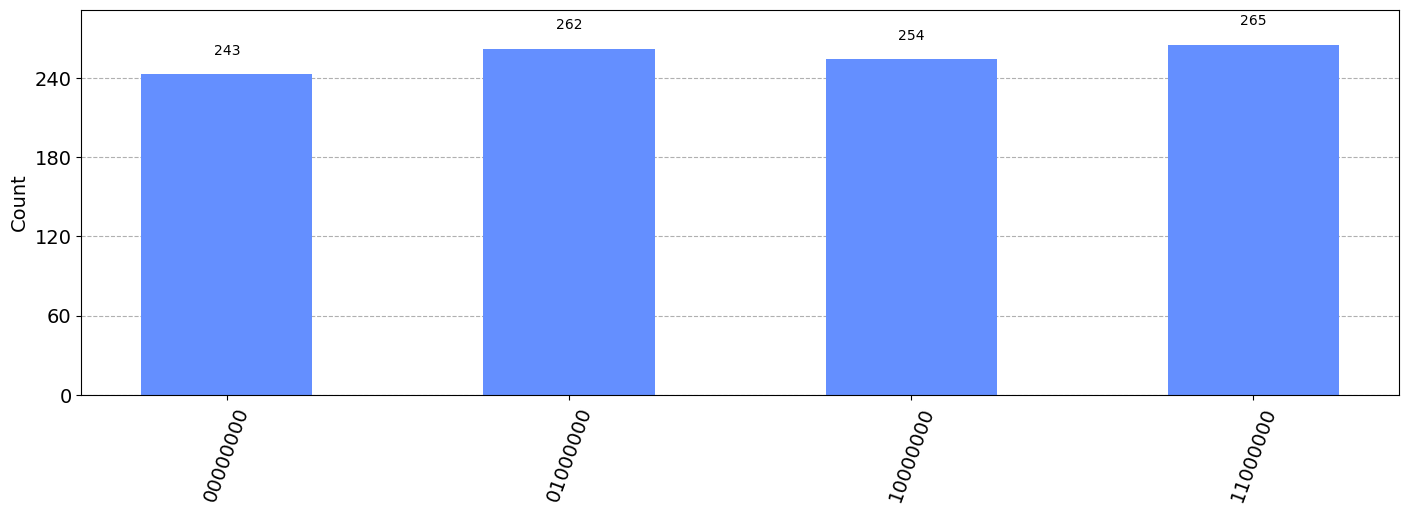

In [794]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()

values = list(counts.values())
mean = np.mean(values)
std_dev = np.std(values)

# Define a threshold for outliers
threshold = 3*std_dev + mean

fig, ax = plt.subplots(figsize=(17, 5))
plot_histogram(counts, ax=ax)

# Add horizontal lines
ax.axhline(mean, color='r', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
ax.axhline(mean + std_dev, color='g', linestyle='--', linewidth=1, label=f'Std Dev: {std_dev:.2f}')
ax.axhline(mean - std_dev, color='g', linestyle='--', linewidth=1)
ax.axhline(threshold, color='orange', linestyle='--', linewidth=1, label=f'threshold: {threshold:.2f}')
ax.legend()
ax.set_xticklabels([])

plt.show()


# Identify outliers
outliers = {key: val for key, val in counts.items() if val > threshold}

if outliers:
    counts = outliers
    
# Print outliers
print("Outliers:", counts)

# Plot histogram
plot_histogram(counts, figsize=(17, 5))


Outliers: {'1000000000000000': 12, '1100000000000000': 22, '0111101111000100': 6, '0101110111011110': 6, '0000000000000000': 10, '0001110111100010': 7, '0100000000000000': 20}


C:\Users\ahmed\AppData\Local\Temp\ipykernel_9372\2567737695.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_histogram(counts, figsize=(17, 5)).show()


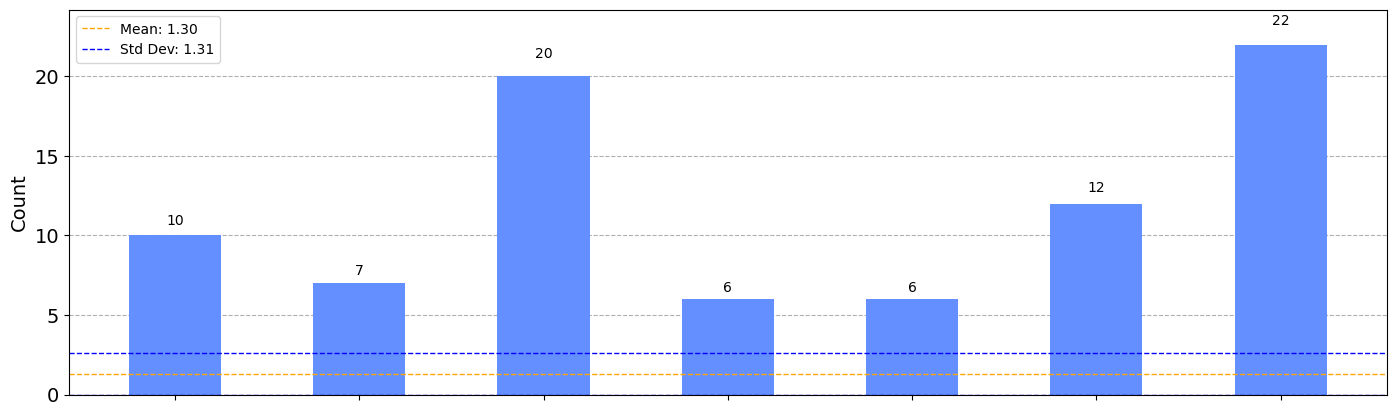

In [797]:
import math
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def find_all_as(N):
    ns = []
    for n in range(2, N):
        if math.gcd(n, N) == 1:
            ns.append(n)
    return ns

def c_amodN(a, N, power):
    n_len = math.ceil(math.log2(N))
    ns = find_all_as(N)
    
    if a not in ns:
        raise ValueError(f"'a' must be {ns}")
    
    U = QuantumCircuit(n_len)
    
    for i, bit in enumerate(format(pow(a, power, N) ^ 1, f'0{n_len}b')):
        if bit == '1':
            U.x(i)
    
    U = U.to_gate()
    U.name = f"{a}^{power} mod {N}"
    c_U = U.control()
    
    return c_U

N = 143
a = 2
n_len = math.ceil(math.log2(N))
m_len = 2 * n_len

qc = QuantumCircuit(m_len + n_len, m_len)

for q in range(m_len):
    qc.h(q)

qc.x(m_len)

for q in range(m_len):
    qc.append(c_amodN(a, N, 2**q), [q] + [i + m_len for i in range(n_len)])

qc.append(QFT(m_len, inverse=True), range(m_len))

qc.measure(range(m_len), range(m_len))

# Use the general-purpose Aer simulator
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()

# Plot histogram
plot_histogram(counts, figsize=(17, 5)).show()

values = list(counts.values())
mean = np.mean(values)
std_dev = np.std(values)

# Define a threshold for outliers
threshold = 3 * std_dev

# Identify outliers
outliers = {key: val for key, val in counts.items() if abs(val - mean) > threshold}

if outliers:
    counts = outliers

print("Outliers:", counts)

# Filter counts to include only those that exceed the threshold
filtered_counts = {key: val for key, val in counts.items() if abs(val - mean) > threshold}

# Plot histogram with horizontal lines for mean and std_dev
fig, ax = plt.subplots(figsize=(17, 5))
plot_histogram(filtered_counts, ax=ax)

# Add horizontal lines
ax.axhline(mean, color='orange', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')
ax.axhline(mean + std_dev, color='blue', linestyle='--', linewidth=1, label=f'Std Dev: {std_dev:.2f}')
ax.axhline(mean - std_dev, color='blue', linestyle='--', linewidth=1)
ax.legend()

# Remove x-axis labels
ax.set_xticklabels([])

plt.show()


In [828]:
qc.draw()

┌───┐           ░            ░            ░            ░            ░ »
q_0: ┤ H ├──■────■───░────────────░────────────░────────────░────────────░─»
     ├───┤  │    │   ░            ░            ░            ░            ░ »
q_1: ┤ H ├──┼────┼───░───■────■───░────────────░────────────░────────────░─»
     ├───┤  │    │   ░   │    │   ░            ░            ░            ░ »
q_2: ┤ H ├──┼────┼───░───┼────┼───░───■────■───░────────────░────────────░─»
     ├───┤  │    │   ░   │    │   ░   │    │   ░            ░            ░ »
q_3: ┤ H ├──┼────┼───░───┼────┼───░───┼────┼───░───■────■───░────────────░─»
     ├───┤  │    │   ░   │    │   ░   │    │   ░   │    │   ░            ░ »
q_4: ┤ H ├──┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░───■────■───░─»
     ├───┤  │    │   ░   │    │   ░   │    │   ░   │    │   ░   │    │   ░ »
q_5: ┤ H ├──┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░───┼────┼───░─»
     ├───┤  │    │   ░ ┌─┴─┐  │   ░   │    │   ░ ┌─┴─┐  │   ░   │    │   ░ »
q_6: ┤ X ├──┼────┼───░─┤ X ├──┼───░───┼────┼───░─┤ X ├──┼───░───┼────┼───░─»
     └───┘┌─┴─┐  │   ░ └───┘  │   ░ ┌─┴─┐  │   ░ └───┘  │   ░ ┌─┴─┐  │   ░ »
q_7: ─────┤ X ├──┼───░────────┼───░─┤ X ├──┼───░────────┼───░─┤ X ├──┼───░─»
          └───┘┌─┴─┐ ░      ┌─┴─┐ ░ └───┘┌─┴─┐ ░      ┌─┴─┐ ░ └───┘┌─┴─┐ ░ »
q_8: ──────────┤ X ├─░──────┤ X ├─░──────┤ X ├─░──────┤ X ├─░──────┤ X ├─░─»
               └───┘ ░      └───┘ ░      └───┘ ░      └───┘ ░      └───┘ ░ »
c: 6/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                ░ ┌───────┐ ░ ┌─┐               
«q_0: ───────────░─┤0      ├─░─┤M├───────────────
«                ░ │       │ ░ └╥┘┌─┐            
«q_1: ───────────░─┤1      ├─░──╫─┤M├────────────
«                ░ │       │ ░  ║ └╥┘┌─┐         
«q_2: ───────────░─┤2      ├─░──╫──╫─┤M├─────────
«                ░ │  IQFT │ ░  ║  ║ └╥┘┌─┐      
«q_3: ───────────░─┤3      ├─░──╫──╫──╫─┤M├──────
«                ░ │       │ ░  ║  ║  ║ └╥┘┌─┐   
«q_4: ───────────░─┤4      ├─░──╫──╫──╫──╫─┤M├───
«                ░ │       │ ░  ║  ║  ║  ║ └╥┘┌─┐
«q_5: ──■────■───░─┤5      ├─░──╫──╫──╫──╫──╫─┤M├
«     ┌─┴─┐  │   ░ └───────┘ ░  ║  ║  ║  ║  ║ └╥┘
«q_6: ┤ X ├──┼───░───────────░──╫──╫──╫──╫──╫──╫─
«     └───┘  │   ░           ░  ║  ║  ║  ║  ║  ║ 
«q_7: ───────┼───░───────────░──╫──╫──╫──╫──╫──╫─
«          ┌─┴─┐ ░           ░  ║  ║  ║  ║  ║  ║ 
«q_8: ─────┤ X ├─░───────────░──╫──╫──╫──╫──╫──╫─
«          └───┘ ░           ░  ║  ║  ║  ║  ║  ║ 
«c: 6/══════════════════════════╩══╩══╩══╩══╩══╩═
«                               0  1  2  3  4  5

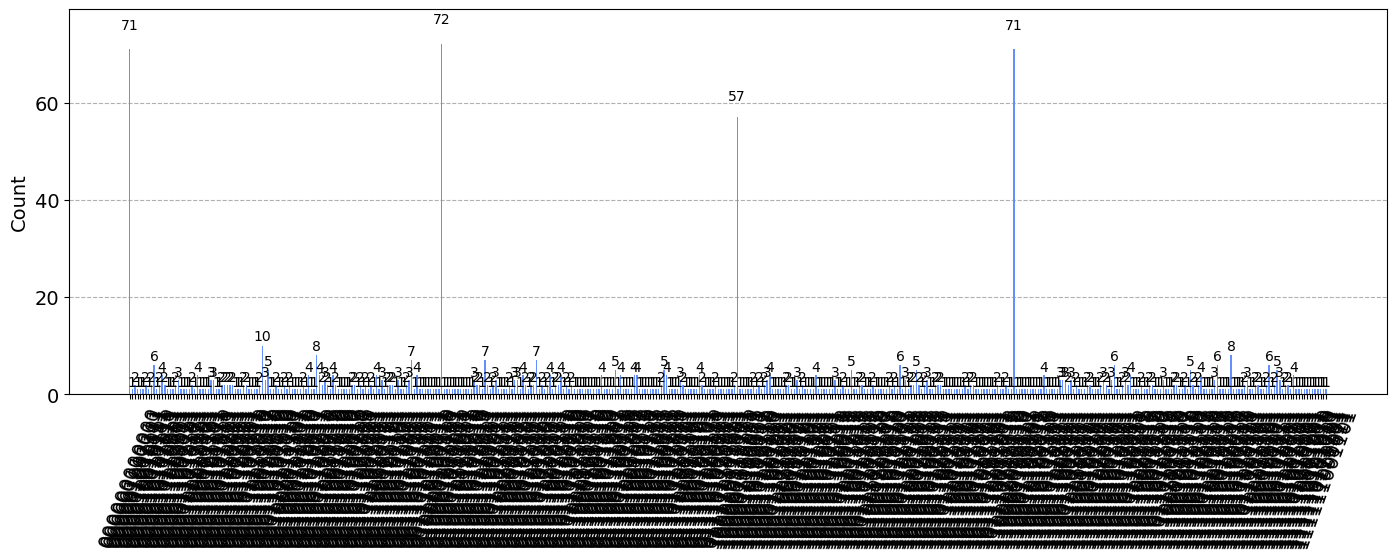

Outliers: {'110000000000': 71, '000000000000': 71, '100000000000': 57, '010000000000': 72}


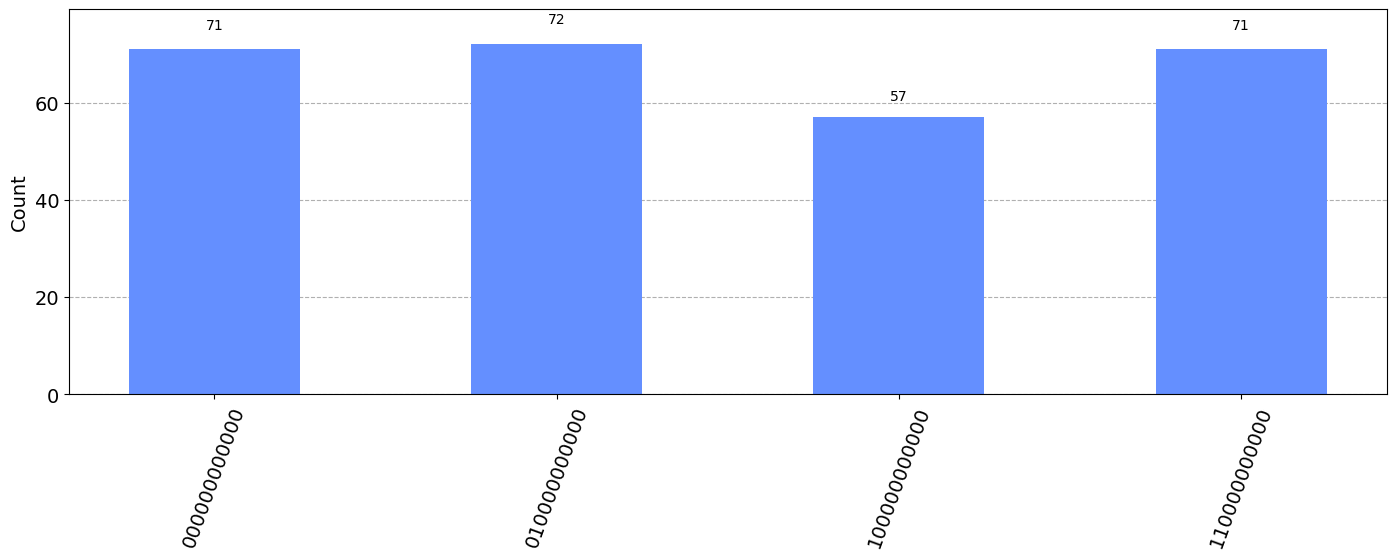

In [912]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
display(plot_histogram(counts, figsize=(17, 5)))


values = list(counts.values())
mean = np.mean(values)
std_dev = np.std(values)

# Define a threshold for outliers
threshold = 3 * std_dev

# Identify outliers
outliers = {key: val for key, val in counts.items() if abs(val - mean) > threshold}

if outliers:
    counts = outliers
    
# Print outliers
print("Outliers:", counts)

# Plot histogram
plot_histogram(counts, figsize=(17, 5))


In [1134]:
def qpe_amodN(a, N, shots=3):
    qc = QuantumCircuit(n_len+m_len, m_len)
    
    for q in range(m_len):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(m_len) # And auxiliary register in state |1>
    
    for q in range(m_len): # Do controlled-U operations
        qc.append(c_amodN(a, N, 2**q),
                 [q] + [i+m_len for i in range(n_len)])
    
    qc.append(QFT(m_len, inverse=True), range(m_len)) # Do inverse-QFT
    
    qc.measure(range(m_len), range(m_len))
    
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=shots, memory=True)
    readings = job.result().get_memory()

    return list(set(readings))

In [1136]:
x = qpe_amodN(a, N, shots=10)
x

['1001101001101011',
 '0100001110111100',
 '0100101111010100',
 '1100010100110011',
 '1110000100011110',
 '1011010010101101',
 '1000000000000000',
 '0101011100100111',
 '0111000011001011',
 '0010111100010001']

In [1106]:
set(original_list)

{'0011110000110100', '0100001110111100', '1011110001001100'}

## Step 4: if $[r = Even]$ AND $[a^r \not≡ −1 Mod N]$

In [899]:
def check_r_condition(a, r, N):
    if r % 2 == 0 and pow(a, r // 2, N) != N - 1:
        return True
    else:
        return False

> The function is to check if $[r = Even]$ AND $[a^r \not≡ −1 Mod N]$

## Step 5: Return the Nontrivial Solutions

Use Euclid’s algorithm to calculate $ GCD((a^{r/2} + 1), N)$ and $GCD((a^{r/2}−1),N) $ . 
Return at least one of the nontrivial solutions.

In [1004]:
# N=143
# a=2
# n_len = math.ceil(math.log2(N))
# m_len = 2*n_len

In [1177]:
from sympy import isprime
import math

def is_power_of_prime(N):
    for base in range(2, int(math.sqrt(N)) + 1):
        power = 2
        while (result := base ** power) <= N:
            if result == N:
                return True
            power += 1
    return False

def is_valid_N(N):
    if isprime(N):
        return False
    if is_power_of_prime(N):
        return False
    return True


In [1198]:
23*17

391

In [210]:
FACTOR_FOUND = False
ATTEMPT = 0

N=391
n_len = math.ceil(math.log2(N))
m_len = 2*n_len

if not is_valid_N(N):
    print(f"{N} is either a prime or a power of a prime.")

while not FACTOR_FOUND and is_valid_N(N):
    ATTEMPT = 0
    for a in range(2,N):
        if math.gcd(a,N)==1:
            ATTEMPT += 1
            _txt = f'\n[a = {a}]'
            print(f"{_txt}\n{'-'*len(_txt)}")
            print(f"ATTEMPT {ATTEMPT}:")
            
            readings = qpe_amodN(a, N, shots=10)
            for reading in readings:
                if FACTOR_FOUND:
                    break
                    
                print("\nRegister Reading: " + reading)
                phase = int(reading,2)/(2**m_len)
                frac = Fraction(phase).limit_denominator(N)
                r = frac.denominator
                print(f"Corresponding Phase: {phase:0.5f} > {frac}")
                
                print(f"Result: r = {r}")

                if not check_r_condition(a, r, N):
                    continue

                if phase != 0:
                    # Guesses for factors are gcd(x^{r/2} ±1 , 15)
                    guesses = [math.gcd(a**(r//2)-1, N), math.gcd(a**(r//2)+1, N)]
                    print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
                    for guess in guesses:
                        if guess not in [1,N] and (N % guess) == 0:
                            # Guess is a factor!
                            print(f"*** Non-trivial factor found: {guess} ***")
                            FACTOR_FOUND = True

        else:
            print(f'\n# [{a}] is not an accepted value! #')
            
        if FACTOR_FOUND:
            break
    
    if not FACTOR_FOUND:
        print('\nALL VALID A VALUES ARE USED !')
        FACTOR_FOUND = True

NameError: name 'is_valid_N' is not defined

In [1200]:
def run_on_simulation(qc, shots=1024):
#     simulator = Aer.get_backend('qasm_simulator')
    simulator = Aer.get_backend('statevector_simulator')
    job = execute(qc, simulator, shots=shots)

    return job.result()

def least_busy_backend(n_qubits):
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n_qubits+1) and
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)
    
    return backend


def run_on_IBMQ(qc, backend, shots=100):
    transpiled_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(transpiled_qc, shots=shots)
    job_monitor(job, interval=2)
    
    return job.result()


In [1202]:
backend = least_busy_backend(10)

ibmqfactory.load_account:WARNING:2024-05-14 23:16:05,800: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_sherbrooke


# Shor's algorithm breaking RSA


## Step 1: Key Generation (Alice)

1. **Choosing Primes and Generating Keys:**
   - Alice selects two large prime numbers, denoted as `p` and `q`.
   - She then calculates their product `N = p * q`. This number, `N`, is part of her public key.
   - The public key also includes a number `e`, which is chosen such that it is coprime with `(p-1)*(q-1)`.
   - Alice then computes a number `d` satisfying `d ≡ e^-1 (mod (p-1)*(q-1))`. The number `d` is her private key.
   - The public key is the pair `(N, e)`, and the private key is `d`.



## Step 2: Encryption (Bob)

1. **Encrypting the Message:**
   - Bob wants to send a message `M` securely to Alice.
   - He uses Alice's public key `(N, e)` to encrypt his message.
   - The encrypted message, or ciphertext, `C`, is computed as `C ≡ M^e (mod N)`.



## Step 3: Decryption (Alice)

1. **Decrypting the Message:**
   - Alice receives the encrypted message `C` from Bob.
   - She uses her private key `d` to decrypt the message.
   - The original message `M` is recovered by computing `M ≡ C^d (mod N)`.


## Step 4: Breaking RSA with Shor's Algorithm (Eve)

1. **Using Shor's Algorithm:**
   - Eve, an eavesdropper, intercepts the encrypted message `C` and wants to decrypt it.
   - She uses `Shor's algorithm` on a quantum computer to efficiently factor `N` into `p` and `q`.
   - With `p` and `q`, Eve can compute `(p-1)*(q-1)` and then find `d` (since `e` is public).
   - Knowing `d`, Eve can decrypt `C` and read Bob's original message `M`.



## Breaking RSA with Shor's Algorithm
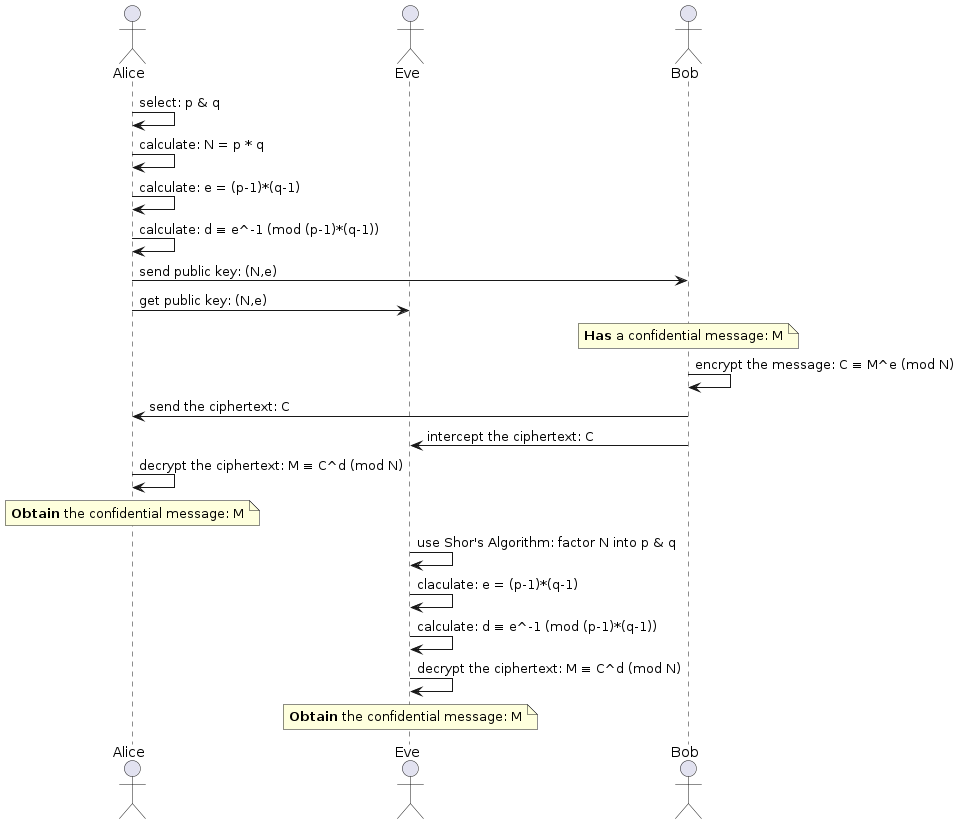

In [33]:
import iplantuml

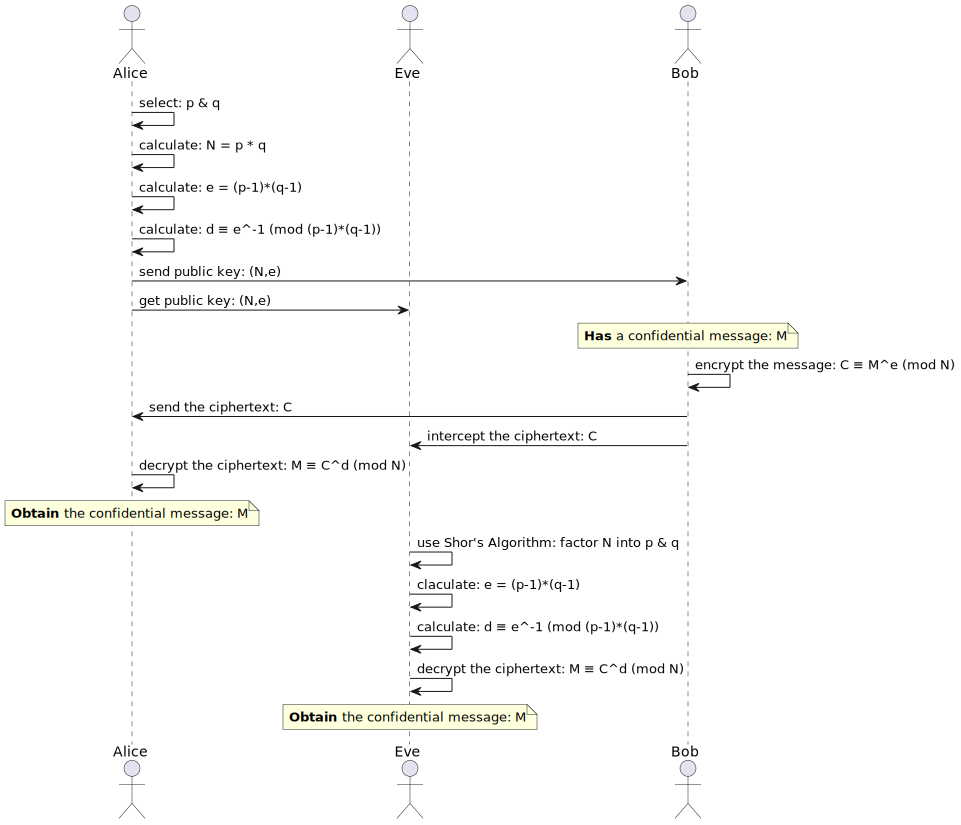

In [135]:
%%plantuml

@startuml
actor Alice as a
actor Eve as e
actor Bob as b

a -> a : select: p & q
a -> a : calculate: N = p * q
a -> a : calculate: e = (p-1)*(q-1)
a -> a : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
a -> b : send public key: (N,e)
a -> e : get public key: (N,e)
note over of b : **Has** a confidential message: M
b -> b : encrypt the message: C ≡ M^e (mod N)
b -> a : send the ciphertext: C
b -> e : intercept the ciphertext: C
a -> a : decrypt the ciphertext: M ≡ C^d (mod N)
note over of a : **Obtain** the confidential message: M
e -> e : use Shor's Algorithm: factor N into p & q
e -> e : claculate: e = (p-1)*(q-1)
e -> e : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
e -> e : decrypt the ciphertext: M ≡ C^d (mod N)
note over of e: **Obtain** the confidential message: M

@enduml


## UML to Image

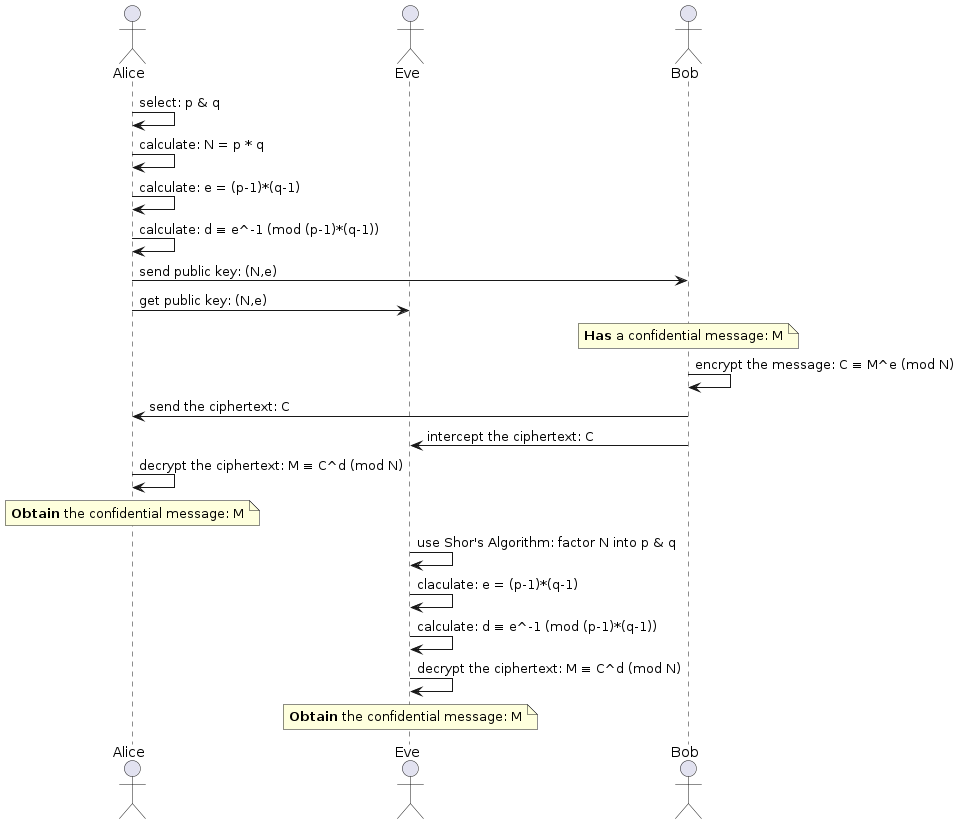

In [138]:
from plantuml import PlantUML
from IPython.display import Image, display

# Server URL (you can use the default public PlantUML server or set up your own)
server_url = 'https://www.plantuml.com/plantuml/png/'

plantuml_service = PlantUML(url=server_url)

def render_plantuml_diagram(uml_code):
    """
    Renders a UML diagram from PlantUML code using the specified PlantUML server.
    """
    diagram = plantuml_service.processes(uml_code)
    display(Image(diagram))
    

    
plantuml_code = """
@startuml
actor Alice as a
actor Eve as e
actor Bob as b

a -> a : select: p & q
a -> a : calculate: N = p * q
a -> a : calculate: e = (p-1)*(q-1)
a -> a : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
a -> b : send public key: (N,e)
a -> e : get public key: (N,e)
note over of b : **Has** a confidential message: M
b -> b : encrypt the message: C ≡ M^e (mod N)
b -> a : send the ciphertext: C
b -> e : intercept the ciphertext: C
a -> a : decrypt the ciphertext: M ≡ C^d (mod N)
note over of a : **Obtain** the confidential message: M
e -> e : use Shor's Algorithm: factor N into p & q
e -> e : claculate: e = (p-1)*(q-1)
e -> e : calculate: d ≡ e^-1 (mod (p-1)*(q-1))
e -> e : decrypt the ciphertext: M ≡ C^d (mod N)
note over of e: **Obtain** the confidential message: M

@enduml
"""

render_plantuml_diagram(plantuml_code)
